In [468]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore

In [469]:
df_train=pd.read_csv("E:\\bigdatamart_Train.csv")
df_train.head(5)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


training data set loaded

In [470]:
df_test=pd.read_csv("E:\\bigdatamart_Test.csv")
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


loading test dataset

In [471]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [472]:
df_test.shape

(5681, 11)

In [473]:
df_test.shape
df_train.shape

(8523, 12)

In this data set both test and train data set has 8523 rows and 12 coloumns

In [474]:
df_train.dtypes
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In this dataset it 12 features,

*Outlet_Establishment_Year is integer type

*item_weight,item _mrp,item_visibility are float type

*remaining all are object type


__Handling missing values in train dataset

Training a model with a data set that has a lot of missing values can drastically impact the quality of machine learning model so i'm finding null values in the dataset

In [475]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The feature item_weight  has 1463 null values and outlet feature has 2410 null values

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

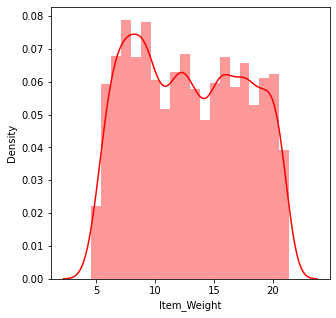

In [476]:
plt.figure(figsize=(5,5))
sns.distplot(df_train.Item_Weight,color="red",kde=True)

The feature Item_weight is not having normal curve so i'm using median to fill the null values of item weight

In [477]:
data_mod=df_train

In [478]:
data_mod['Item_Weight'].fillna((data_mod['Item_Weight'].mean()), inplace=True)

In [479]:
data_mod.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [480]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

___Outlet_size feature is a categorical data so I'm using mode to fill the null values

In [481]:
data_mod['Outlet_Size']=data_mod['Outlet_Size'].fillna(data_mod['Outlet_Size'].mode().iloc[0])

In [482]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

all null values are removed

##Univariate Analysis

In [483]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [484]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

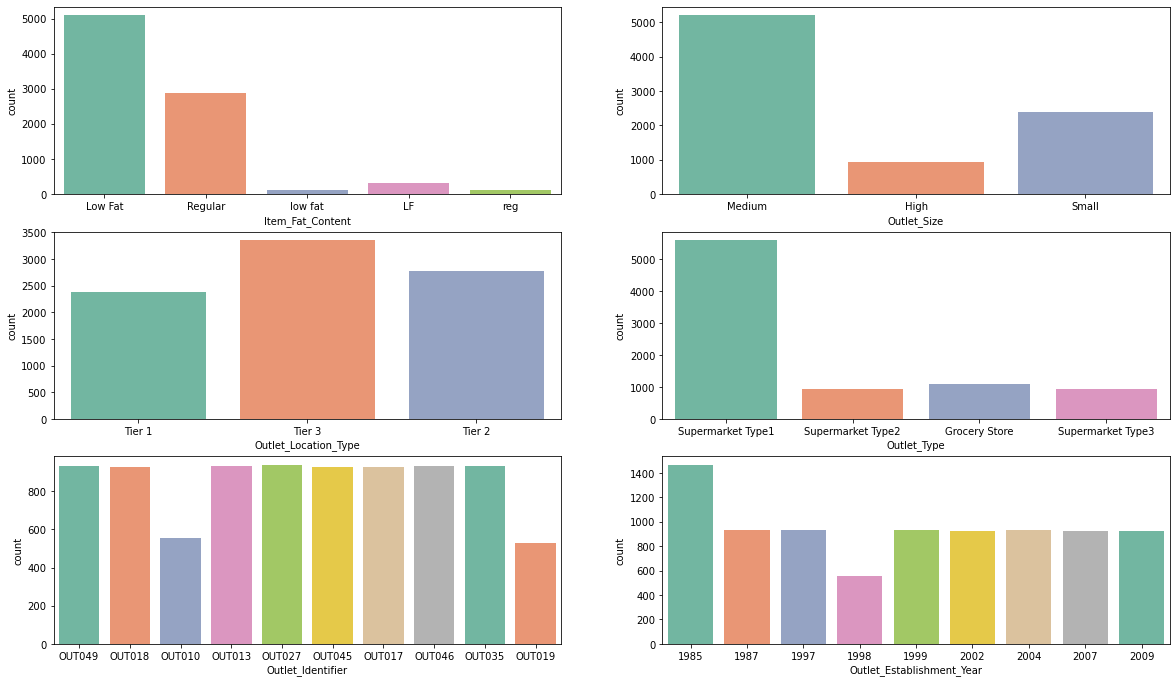

In [485]:
data=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year']
ncol=2
nrows=5
plt.figure(figsize=(20,20))
for i in range(0,6):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=data_mod,palette="Set2")

    from the above count plots its apparent that the majority product is low fats products
    
    maximum sales in the year1985
    
    supermarket Type1 has more sales
    

In [486]:
data1=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Item_Type' ]

In [487]:
for col in data1:
    print(col)
    print(data_mod[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads     

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

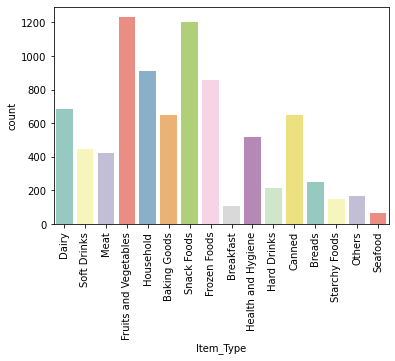

In [488]:
l = list(data_mod['Item_Type'].unique())
chart = sns.countplot(data_mod["Item_Type"],palette="Set3")
chart.set_xticklabels(labels=l, rotation=90)
l

<AxesSubplot:xlabel='Item_Weight'>

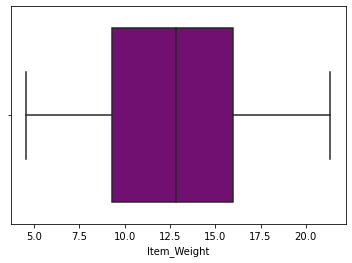

In [489]:
sns.boxplot(data_mod['Item_Weight'],color="purple")

<AxesSubplot:xlabel='Item_Visibility'>

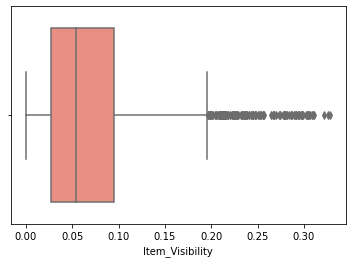

In [490]:
sns.boxplot(data_mod['Item_Visibility'],color="salmon")

<AxesSubplot:xlabel='Item_MRP'>

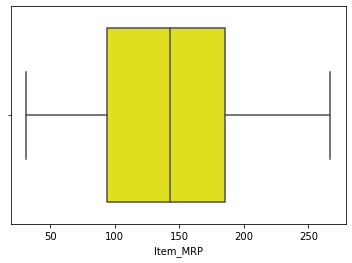

In [491]:
sns.boxplot(data_mod['Item_MRP'],color=(1,1,0))

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

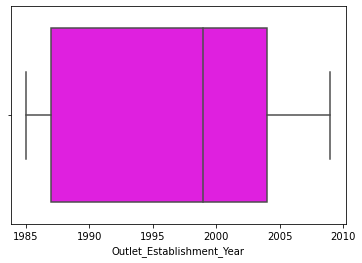

In [492]:
sns.boxplot(data_mod['Outlet_Establishment_Year'],color=(1,0,1))

In [493]:
In all float type features the Item visibility feature  has outlier

SyntaxError: invalid syntax (<ipython-input-493-a34f2634511f>, line 1)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

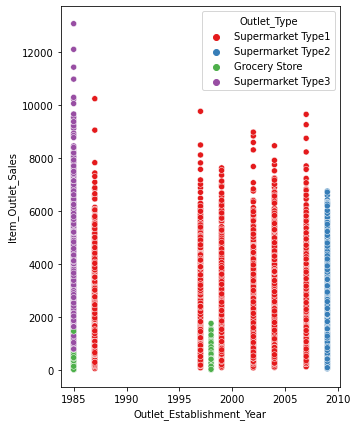

In [494]:
plt.figure(figsize=(5,7))
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Type',data=data_mod,palette="Set1")

The information from the above plot are

In 1985 the majority of sale from supermarket type3
In 1986 to 2008 the major sales from supermarket type1
In 2009 to 2010 the major sales from supermarket type2
 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

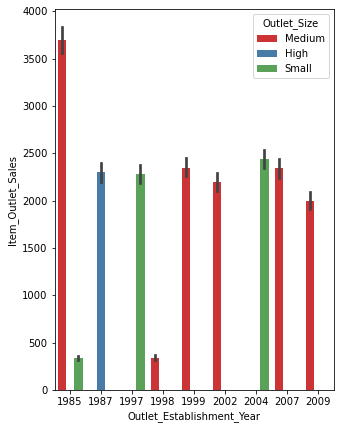

In [495]:
plt.figure(figsize=(5,7))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',data=data_mod,palette="Set1")

outlet sales is higher in outlet_size medium and small

In [561]:
!pip install plotly



In [496]:
import plotly.express as px
fig=px.sunburst(data_mod,path=['Outlet_Type','Item_Type'],values='Item_Outlet_Sales')
fig.show()

most of the items get selled from type1 supermarket and the most saled item is fruits and vegetables.seafood and breakfast items are least selling items

In [ ]:
___Multivariate

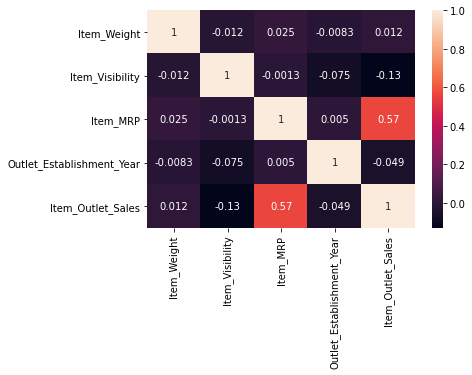

In [403]:
sns.heatmap(data_mod.corr(),annot=True)
plt.show()

<AxesSubplot:>

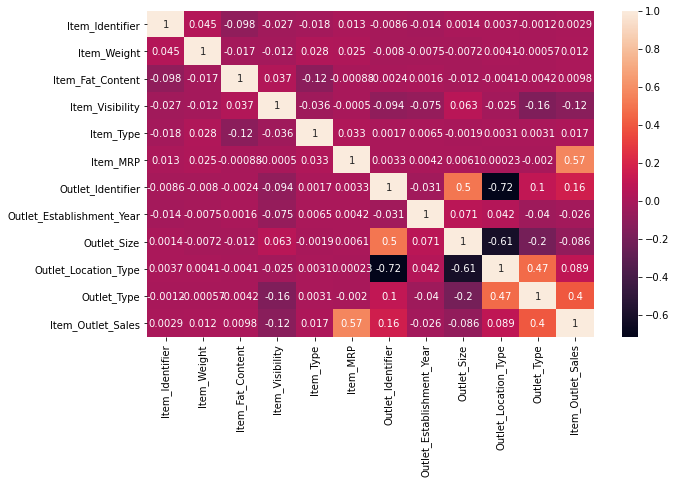

In [419]:
correlation=data_t.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

the feature outlet type is highly correlated with sales feature
outlet size is negatively correlated with outlet type

___Identifing and removing outliers using zscore

The features 'Item_Weight', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type' all are categorical coloumns.Even if i has outliers it wont affect target value

In [497]:
z = np.abs(zscore(data_mod['Item_Visibility']))
print(np.where(z > 3))

(array([  49,   83,  108,  174,  434,  502,  521,  532,  854, 1159, 1272,
       1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805,
       1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728,
       2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750,
       3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4656, 4674, 4789,
       4941, 5031, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891,
       5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005,
       7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744,
       7866, 7949, 8194, 8215, 8273, 8345, 8432], dtype=int64),)


In [498]:
upper_limit = df_train['Item_Visibility'].mean() + 3*df_train['Item_Visibility'].std()
lower_limit = df_train['Item_Visibility'].mean() - 3*df_train['Item_Visibility'].std()

In [499]:
data_clean=data_mod

In [500]:
data_clean['Item_Visibility'] = np.where(
    data_mod['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        data_mod['Item_Visibility']<lower_limit,
        lower_limit,
        data_mod['Item_Visibility']
    )
)

In [501]:
data_clean.shape

(8523, 12)

<AxesSubplot:xlabel='Item_Visibility'>

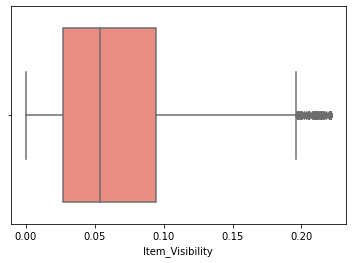

In [502]:
sns.boxplot(data_clean['Item_Visibility'],color="salmon")

__Handling skewness

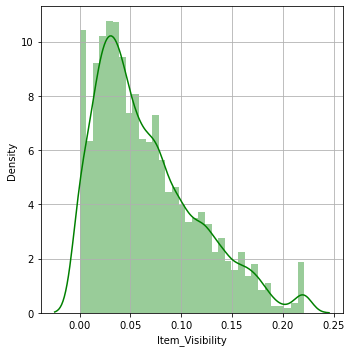

In [503]:
plt.figure(figsize=(5,5))
sns.distplot(data_clean['Item_Visibility'],color='green',kde=True)
plt.grid()
    ##plt.legend(loc='upper right')
plt.tight_layout()

In [504]:
data_mod['Item_Visibility'].skew()

0.9159386853302449

In [505]:
data_s=data_clean

In [506]:
data_s['Item_Visibility']=np.log1p(data_clean['Item_Visibility'])

In [507]:
data_s['Item_Visibility'].skew()

0.8175445529551456

In [508]:
data_s.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


__converting categorical columns to numerical coloumn by label encoding technique

In [509]:
data_t=data_s

In [510]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
##df = pd.get_dummies(data_t, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier','Item_Type','New_Item_Type','Outlet_Identifier'])
col_l=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Item_Type','Outlet_Establishment_Year']
for i in col_l:
    data_t[i]= label.fit_transform(data_t[i]) 
    print(i,data_t[i].unique())

Item_Fat_Content [1 2 3 0 4]
Outlet_Size [1 0 2]
Outlet_Location_Type [0 2 1]
Outlet_Type [1 2 0 3]
Outlet_Identifier [9 3 0 1 5 7 2 8 6 4]
Item_Type [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Establishment_Year [4 8 3 1 0 5 7 2 6]


In [511]:
data_t['Item_Identifier']= label.fit_transform(data_t['Item_Identifier']) 
data_t.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.015920,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,2,0.019095,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,1,0.016621,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1,0,2,1,994.7052


__Modelling

In [512]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [513]:
x1=data_t.drop('Item_Outlet_Sales',axis=1)
y1=df_train['Item_Outlet_Sales']

_To scale the unscaled data ,I have used minmax scalar transmormation because min max scalar does not lose any data.if I use any other scalar like zscore it will lose some data which inturn decrease the accuracy

In [514]:
from sklearn import preprocessing 
unscaled=x1
scaled = preprocessing.MinMaxScaler().fit_transform(unscaled)

In [515]:
x=scaled
y=y1

In [516]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(), xgb.XGBRegressor(objective="reg:squarederror")]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [517]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    acc=m.score(xtest,ytest)
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print("accuracy score",acc)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

KNeighborsRegressor()
accuracy score 0.5179380849104658
Mean absolute error 838.548046697476
Mean squared error 1433522.3221206996
Root Mean squared error 1197.2979253806045
R2 Score 0.5179380849104658
---------------------------------------------------------------------------------------------------------
SVR()
accuracy score 0.03985265139555538
Mean absolute error 1267.6211611841081
Mean squared error 2855219.658856137
Root Mean squared error 1689.7395239669743
R2 Score 0.03985265139555538
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
accuracy score 0.24267371438317065
Mean absolute error 1042.7090723071456
Mean squared error 2252084.4347532466
Root Mean squared error 1500.6946507378664
R2 Score 0.24267371438317065
---------------------------------------------------------------------------------------------------------
LinearRegression()
accuracy score 0.5055308623417071
Mean absolute error 914.977686

In [518]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  RandomForestRegressor() 796.6786728681124
Minimum Mean squared error is shown by  RandomForestRegressor() 1316112.8730248897
Minimum Root Mean squared error is shown by  RandomForestRegressor() 1147.2196271965058
Maximun R2 Score is shown by  RandomForestRegressor() 0.5574202910870695


I have used 6 models (linear regressor,lasso,ridge,Kneighbours classifier,random forest classifier and xgb classifier.In which random forest has high accuracy  0.5570214435060694

__cross validation

In [519]:
from sklearn.model_selection import cross_val_score
knr=KNeighborsRegressor()
scores=cross_val_score(knr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.500304  , 0.51059728, 0.54275518, 0.50928302, 0.49682464])

In [520]:
from sklearn.model_selection import cross_val_score
rid=Ridge()
scores=cross_val_score(rid,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.50137447, 0.50286639, 0.52789409, 0.51985641, 0.49624128])

In [521]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.50129857, 0.50283137, 0.52787437, 0.51989783, 0.49631162])

In [522]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.50118721, 0.50325067, 0.5283126 , 0.51995805, 0.49593806])

In [523]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.54263077, 0.56383156, 0.57885913, 0.56742854, 0.55325146])

In [524]:
from sklearn.model_selection import cross_val_score
x=xgb.XGBRegressor()
scores=cross_val_score(x,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.49595757, 0.49987646, 0.53187967, 0.54108629, 0.51118582])

__hyper Tuning

In [531]:
from sklearn.model_selection import GridSearchCV,KFold
params = {"max_features": ['auto', 'sqrt','log2'],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[True],
                "n_estimators":[100,300,10],
                 'criterion': ['mse', 'mae']}


gs2 = GridSearchCV(RandomForestRegressor(), params, cv=KFold(n_splits=3), scoring='r2')
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Best param: {'bootstrap': True, 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 300}


__modelling using best parameters

In [532]:
x=scaled
y=y1

In [558]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(bootstrap=True, criterion='mse', max_features='log2', min_samples_leaf=10, n_estimators=300)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)

Accuracy 0.5950306189455429
Mean absolute error 767.2015231082896
Mean squared error 1172764.208542881
Root Mean squared error 1082.94238468299
r2 score 0.5950306189455429


In [ ]:
_Before hyper tuning: 

r2 score of Randomforest Regressor model is 0.5574202910870695

__After hyper tuning 
r2 score of Randomforest Regressor model is 0.5950306189455429


In [ ]:
It is apparent that  after hyper tuning the accuracy is increased.


Best model:Random forest Regressor
Best parameters:{'bootstrap': True, 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 300}

__save the model

In [559]:
from joblib import dump
dump(model, 'model_bigmart.joblib')

['model_bigmart.joblib']

In [560]:
from joblib import load
loaded = load('model_bigmart.joblib')